In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
auto = pd.read_csv("Auto.csv")

In [75]:
auto = auto[['mpg', 'horsepower', 'name', 'year']].copy()
auto = auto.dropna(subset=['mpg', 'horsepower']).reset_index(drop=True)
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna(subset=['horsepower']).reset_index(drop=True)

In [76]:
X = sm.add_constant(auto['horsepower'])
y = auto['mpg']
model = sm.OLS(y, X).fit()

In [77]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        18:57:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [78]:
hp_val = 98
pred_mpg_98 = model.predict([1, hp_val])[0]
print(f"\nPredicted mpg at horsepower={hp_val}: {pred_mpg_98:.3f}")


Predicted mpg at horsepower=98: 24.467


In [79]:
resid = model.resid
mse = np.mean(resid**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(resid))
print(f"R2 = {model.rsquared:.4f}, RMSE ={rmse:.4f}, MAE = {mae:.4f}, mean(mpg) = {y.mean():.4f}") 

R2 = 0.6059, RMSE =4.8932, MAE = 3.8276, mean(mpg) = 23.4459


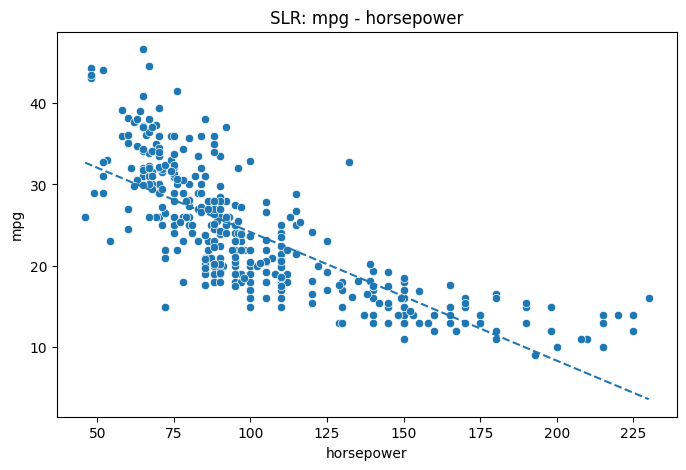

In [80]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='horsepower', y='mpg', data=auto)
xs = np.linspace(auto['horsepower'].min(), auto['horsepower'].max(), 100)
ys = model.params['const'] + model.params['horsepower'] * xs
plt.plot(xs, ys, linestyle='--')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('SLR: mpg - horsepower')
plt.show()

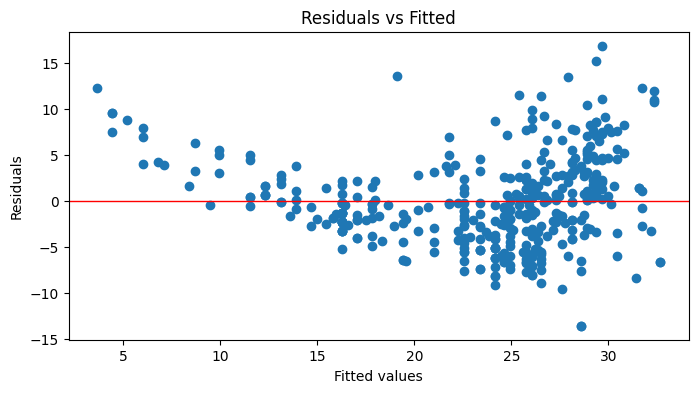

In [81]:
plt.figure(figsize=(8,4))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linewidth=1)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


Simple Linear Regression Analysis (mpg horsepower)

1. Is there a connection between predictor and response?
Yes, there is a statistically significant relationship (p-value = 0.000 < 0.05)

2. What is the strength of the bond?*
Strong*- horsepower explains 60.6% mpg variance 

3. Is the relationship positive or negative? 
A negative coefficient of -0.1578 indicates that fuel consumption worsens with increasing power.

4. Predicted mpg for horsepower = 98: 24.47 mpg

5. Coefficient of determination R2: 0.606 - 60.6% of fuel consumption variability is explained by engine power

6. Statistical significance at level 5%:
Yes, horsepower is statistically significant

7. Standard Error vs mean(mpg): 
- Mean = 23.45
- RMSE = 4.89 
- The model has moderate prediction accuracy

Chart analysis:

Regression graph:  
Confirms a strong negative relationship, but shows possible problems with linearity at high horsepower values.

Residuals vs Fitted:  
Linearity is performed 
Homoscedasticity is NOT satisfied (funnel shape)
heteroscedasticity is observed - the variance of the residuals increases with increasing predicted values

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('mpg')
df = df.dropna()

print("dataset:", df.shape)
print("columns:", df.columns.tolist())
print(df.head())

dataset: (392, 9)
columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [83]:
df_numbers = df.select_dtypes(include=[np.number])
print(df_numbers.columns.tolist())

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


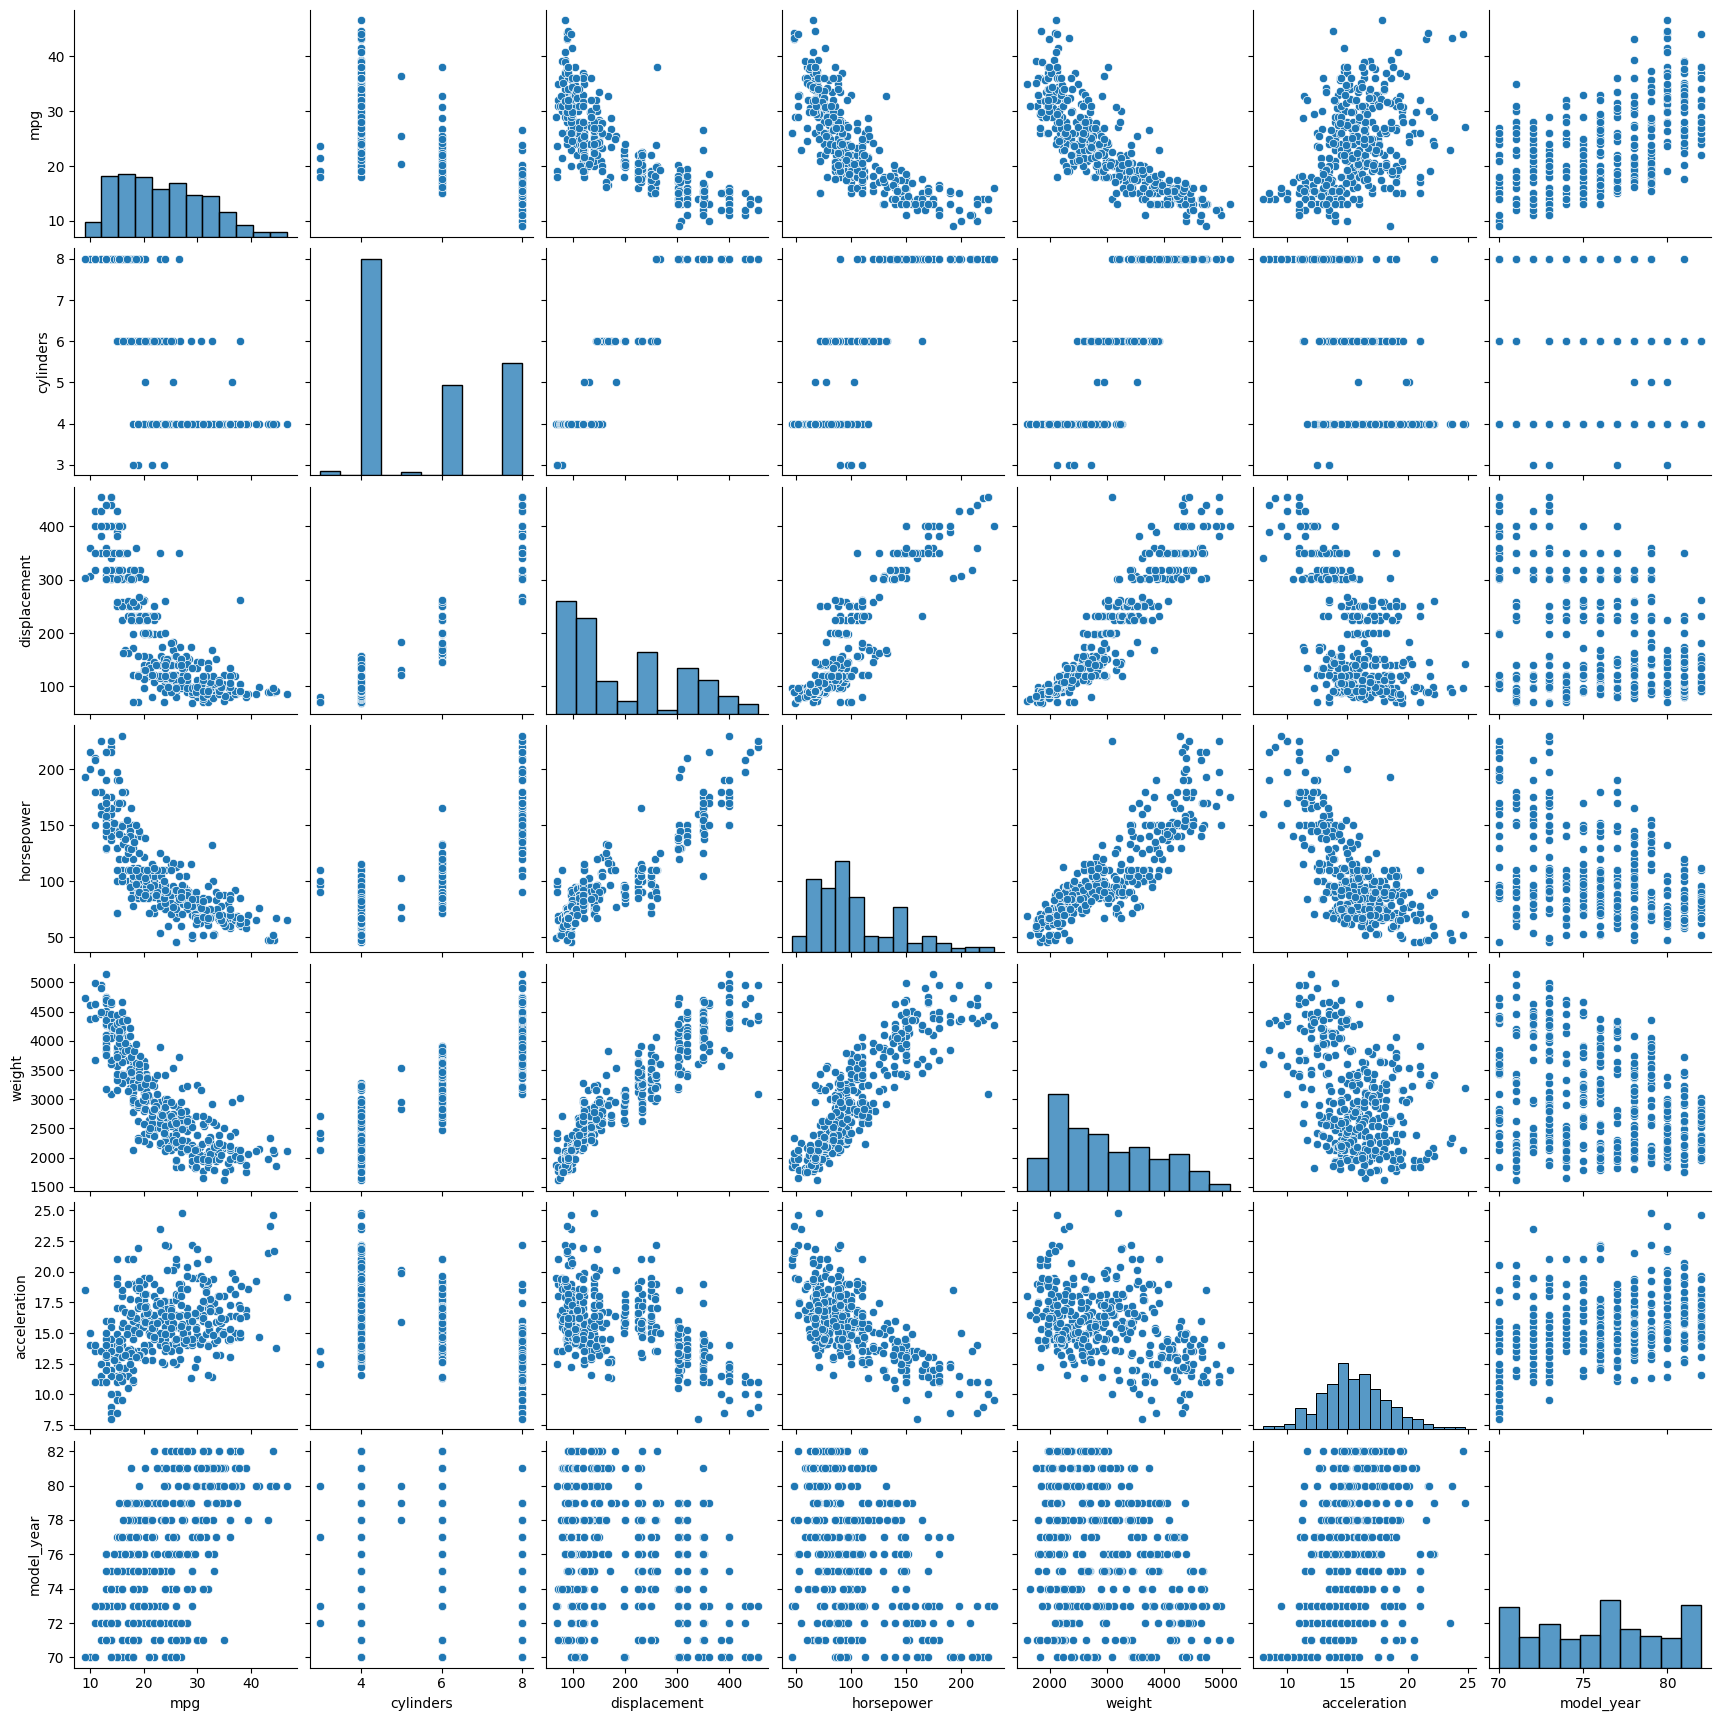

In [84]:
sns.pairplot(df_numbers)
plt.show()

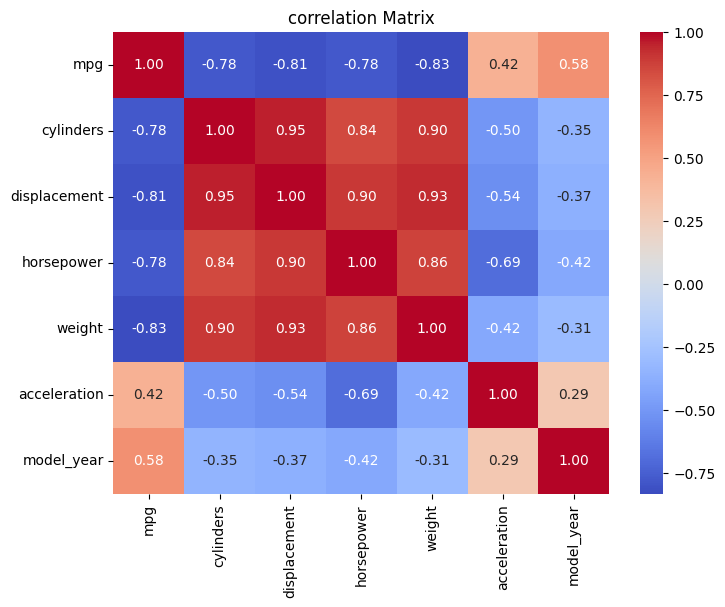

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_numbers.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('сorrelation Matrix')
plt.show()

Strongest correlations with mpg (fuel consumption):
NEGATIVE (impair fuel consumption):

weight (-0.83) - very strong, the heavier the car, the worse the consumption

displacement (-0.81) - engine displacement is strongly affected

horsepower (-0.78) - engine power

cylinders (-0.78) - number of cylinders

POSITIVE (improve consumption):

model_year (0.58) - new cars are more economical!

acceleration (0.42) - faster acceleration is associated with better fuel consumption

Multicollinearity problem:
cylinders ↔ displacement (0.95) - very high correlation

displacement ↔ weight (0.93)

cylinders ↔ weight (0.90)

Conclusions for multiple regression:
weight is the most important predictor for MPG

model_year is the second most important (positive effect)

Multicollinearity will be a problem - you need to be careful with the interpretation of the coefficients.

In [86]:
df_numbers = df.select_dtypes(include=[np.number])
X_multiple = df_numbers.drop('mpg', axis=1)
y_multiple = df_numbers['mpg']

print("Predictors:", X_multiple.columns.tolist())

X_multiple_const = sm.add_constant(X_multiple)

model_multiple = sm.OLS(y_multiple, X_multiple_const)
results_multiple = model_multiple.fit()

print(results_multiple.summary())

Predictors: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 20 Oct 2025   Prob (F-statistic):          3.79e-135
Time:                        18:57:42   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

1. Is there a relationship between predictors and response?
Yes, the model is significant (f statistical p value ≈ 0), R2 = 0.809

2. Which predictors are statistically significant?
weight and model_year (p value < 0.05)

3. Interpretation of the year coefficient:
0.7534 - each new year increases fuel consumption by 0.75 mpg, which shows progress in engine efficiency

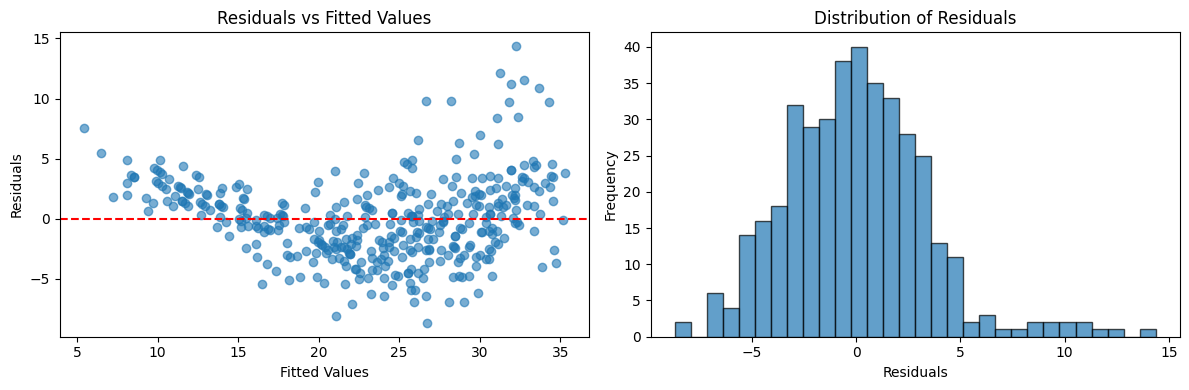

MSE: 11.59
RMSE: 3.40
MAE: 2.62


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

fitted_values = results_multiple.fittedvalues
residuals = results_multiple.resid

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

mse = mean_squared_error(y_multiple, fitted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_multiple, fitted_values)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}") 
print(f"MAE: {mae:.2f}")

1. Problems with the model:

Heteroscedasticity (non-constant variance)

Multiple emissions with large residues

The distribution of residues is not perfectly normal

2. Unusually large emissions?
Yes - there are observations with residues >10 mpg

3. Which metric is more convenient?
RMSE (3.40) - in the same units as mpg, it is convenient to interpret

In [88]:
df_numbers['weight_year_interaction'] = df_numbers['weight'] * df_numbers['model_year']

X_interaction = df_numbers[['weight', 'model_year', 'weight_year_interaction']]
X_interaction_const = sm.add_constant(X_interaction)

model_interaction = sm.OLS(y_multiple, X_interaction_const)
results_interaction = model_interaction.fit()
print(results_interaction.summary())

df_numbers['log_weight'] = np.log(df_numbers['weight'])
df_numbers['log_horsepower'] = np.log(df_numbers['horsepower'])

X_transformed = df_numbers[['log_weight', 'model_year']]
X_transformed_const = sm.add_constant(X_transformed)

model_transformed = sm.OLS(y_multiple, X_transformed_const)
results_transformed = model_transformed.fit()
print(results_transformed.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     649.3
Date:                Mon, 20 Oct 2025   Prob (F-statistic):          8.06e-151
Time:                        18:57:42   Log-Likelihood:                -1009.3
No. Observations:                 392   AIC:                             2027.
Df Residuals:                     388   BIC:                             2043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Task 8: Are the interactions statistically significant?
YES - weight_year_interaction has a p-value = 0.000

Task 9: Effectiveness of transformations:
YES - weight logarithm gave the best model (R2 = 0.837)

im tirrrrrrrrrrrrrred(((((((((())))))))))